In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import os
os.getcwd()

'/content'

#create figures and datasets

In [4]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [10]:
gen=pd.read_csv('drive/MyDrive/gender_voice_dataset.csv')
gen_data=pd.DataFrame(gen)
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
"""
1 target variable: label (male or female)

20 independent variables:
meanfreq: mean frequency of the voice audio of the person (in kHz)
sd: standard deviation of the frequency of the voice audio
median: median frequency of the voice audio (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid(specprop statistical properties of a frequency spectrum)
meanfun: mean fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: mean of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index


if skewness is between -0.5 and 0.5 => data is symmetrical
if skewnwss is between -1 and -0.5 or between 0.5 and 1=> moderately skewed
if skewness is less than -1 or greater than 1 the data => data highly skewed
"""

In [12]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [13]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<ipython-input-15-3a842b195bef>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gen_data.corr(),annot=True,cmap='viridis',linewidth=.5)


<Axes: >

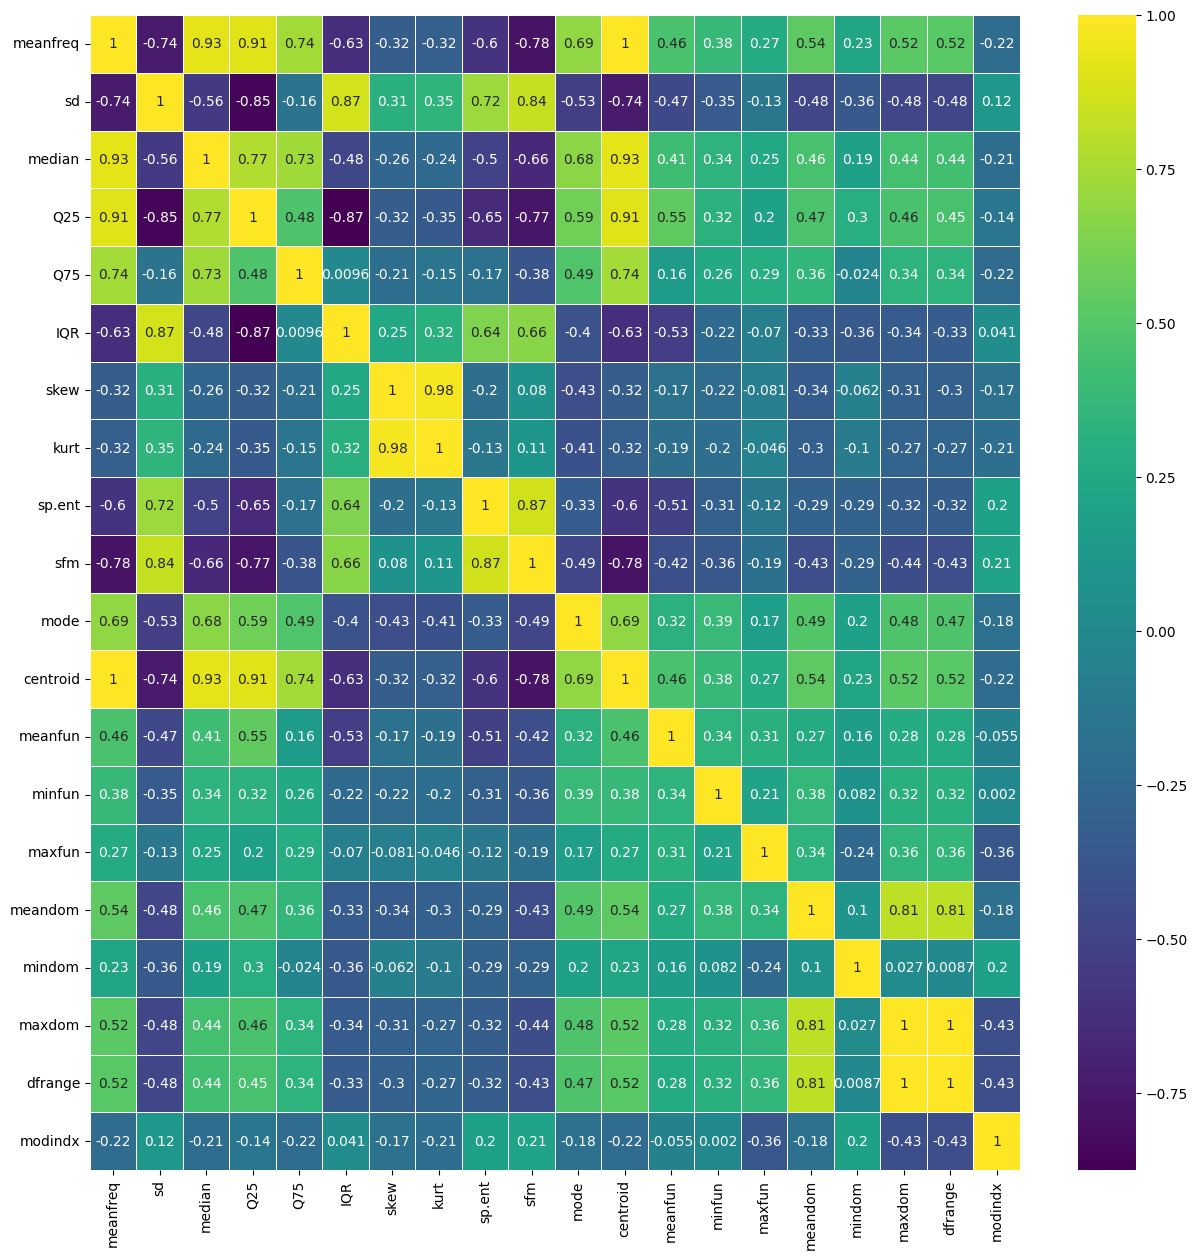

In [15]:
#normalize
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='viridis',linewidth=.5)

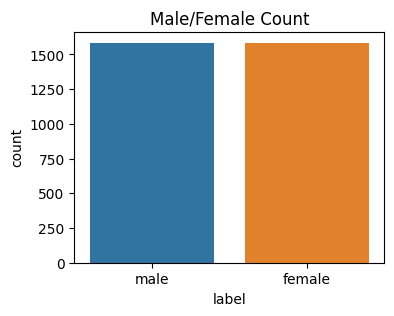

In [19]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(data=gen_data, x='label', ax=ax)
plt.title('Male/Female Count')
plt.show()
#no class imbalance, none class doesnt dominate over the other

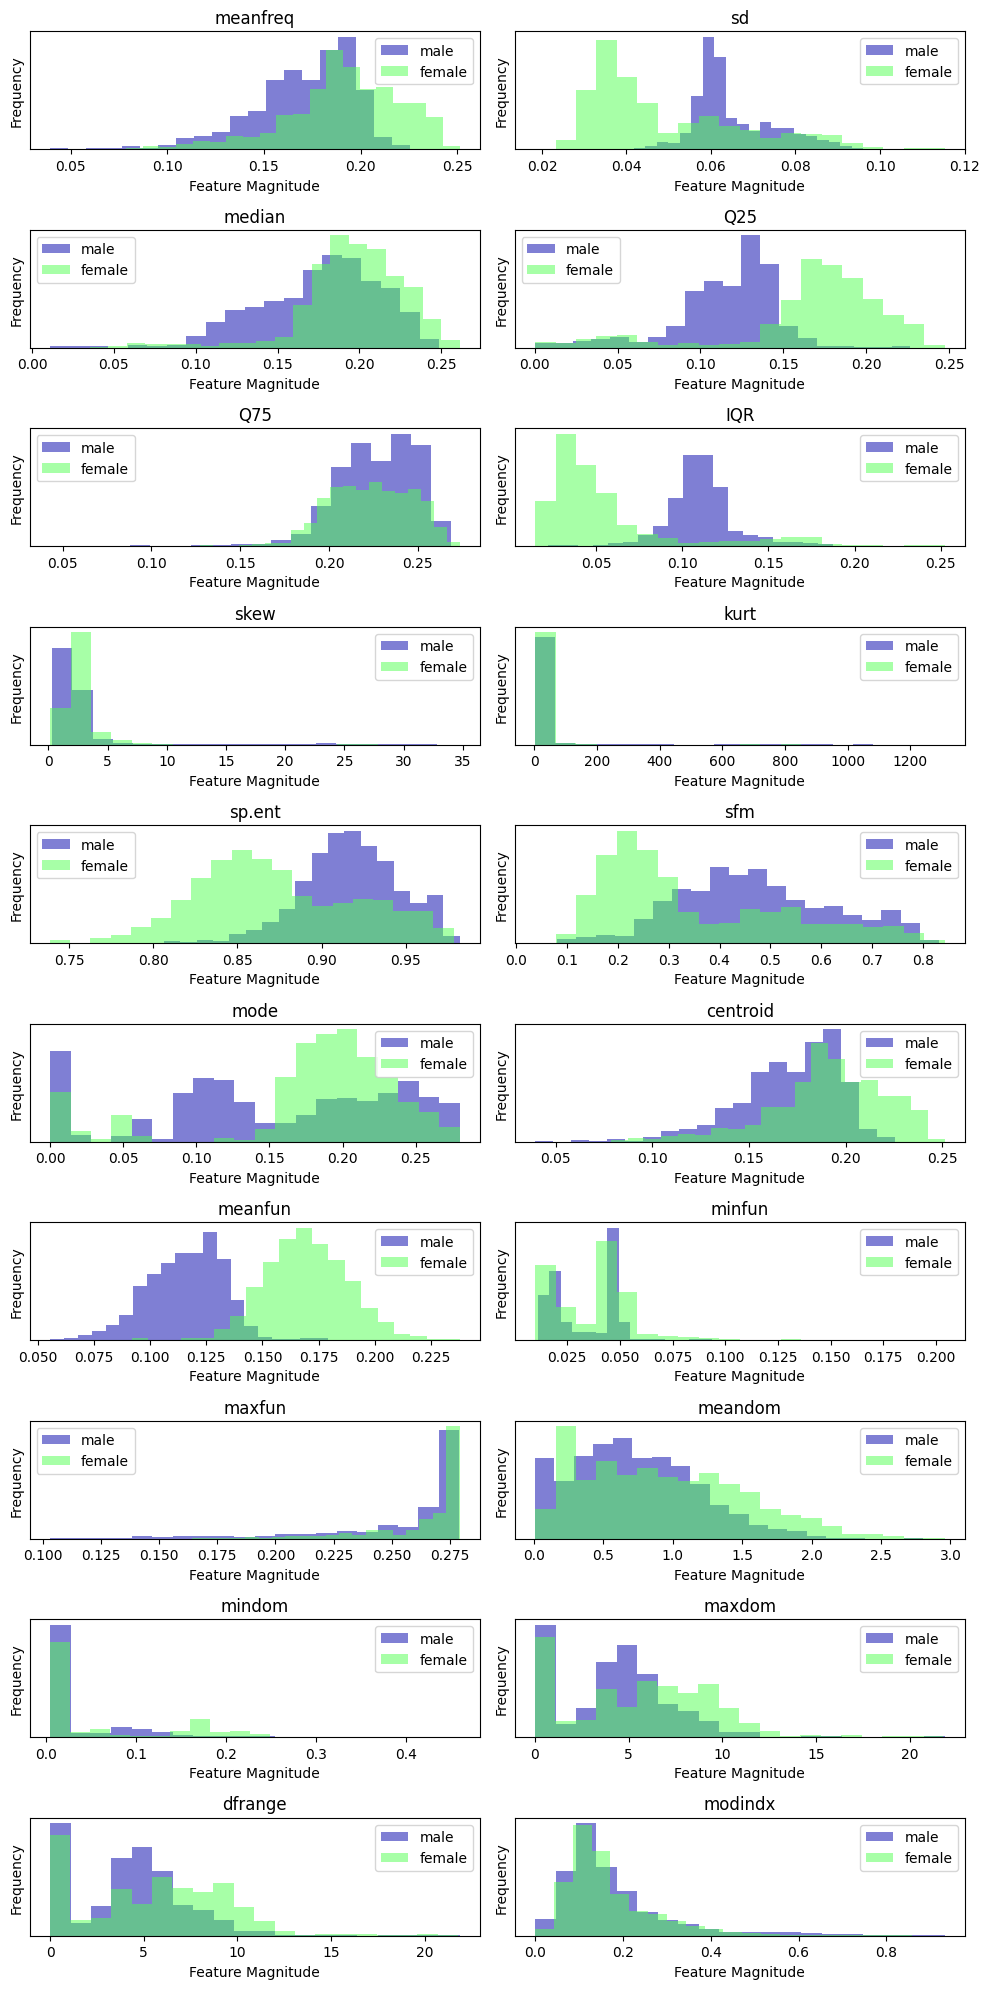

In [22]:
#plot histogram
# Filter the DataFrame to get rows where the 'label' column is 'male'
male=gen.loc[gen['label']=='male']
# Filter the DataFrame to get rows where the 'label' column is 'female'
female=gen.loc[gen['label']=='female']
# Create a 10x2 grid of subplots with a specified size
fig,axes=plt.subplots(10,2,figsize=(10,20))
# Flatten the 10x2 grid of subplots into a 1D array for easier iteration
ax=axes.ravel()
for i in range(20):
  ax[i].hist(male.iloc[:,i],bins=20,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(female.iloc[:,i],bins=20,color=mglearn.cm3(2),alpha=.5)
  ax[i].set_title(list(male)[i])
  ax[i].set_yticks(())
  ax[i].set_xlabel("Feature Magnitude")
  ax[i].set_ylabel("Frequency")
  ax[i].legend(["male","female"],loc="best")
fig.tight_layout()

In [24]:
#features that will help in differentiation
gen_new=gen_data.drop(['dfrange','kurt','sfm','meandom','meanfreq'],axis=1)


In [25]:
gen_new.columns

Index(['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode',
       'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom',
       'modindx', 'label'],
      dtype='object')

In [26]:
y=gen_new['label']
x=gen_new.drop(['label'],axis=1)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
#train the model on SVM
svm=SVC().fit(x_train,y_train)
print("SUPPORT VECTOR MACHINE")
print("Accuracy on training set:{:.2f}".format(svm.score(x_train,y_train)))
print("Accuracy on test set:{:.2f}".format(svm.score(x_test,y_test)))


SUPPORT VECTOR MACHINE
Accuracy on training set:0.72
Accuracy on test set:0.73


In [29]:
#train random forest
forest=RandomForestClassifier(n_estimators=500,random_state=42).fit(x_train,y_train)
print("RANDOM FORESTS")
print("Accuracy on training set:{:.2f}".format(forest.score(x_train,y_train)))
print("Accuracy on test set:{:.2f}".format(forest.score(x_test,y_test)))

RANDOM FORESTS
Accuracy on training set:1.00
Accuracy on test set:0.98


In [35]:
#SAVE MODEL
import pickle
filename="drive/MyDrive/Dataset/Models/voice_model.pickle"
pickle.dump(forest,open(filename,'wb'))